In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos la caja con 5000 datos aleatorios

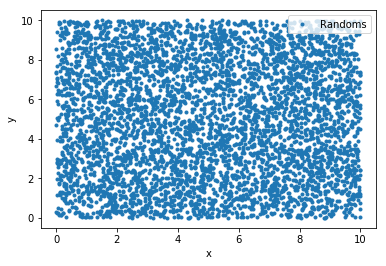

In [4]:
N = 5000#Numero de puntos
L = 10#Longutud de la caja
c_x = np.random.uniform(0.,L,N ) #Cordenada en x primer arreglo
c_y = np.random.uniform(0.,L,N)  #Cordenada en y primer arreglo
plt.plot(c_x,c_y,'.',label='Randoms')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Disco

Generamos el disco con 1000 datos, que es equivalente a la mitad de la caja

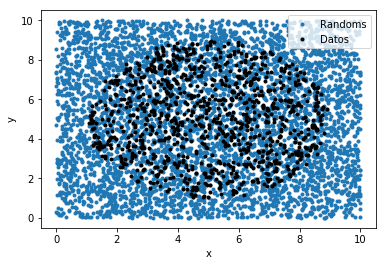

In [9]:
Nm=1000   #Numero de muestras para los datos
rad = 4
theta = np.random.uniform(0.0, 2.0*np.pi, Nm)
r = rad * np.sqrt(np.random.uniform(0.0, 1.0, Nm))
x_c = 5.0+ r * np.cos(theta)
y_c = 5.0+ r * np.sin(theta)
plt.plot(c_x,c_y,'.',label='Randoms')
plt.plot(x_c,y_c,'.',color='k',label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Funcion para la distancia entre puntos

In [16]:
def distancia(x_0,x_1,y_0,y_1):
    d = np.sqrt((x_1 - x_0)**2 + (y_1-y_0)**2)
    return d
#contador
dis_DD = [] #DD(r)
dis_RR = [] #RR(r)
dis_DR = [] #DR(r)

DD: Distancia entre los datos, y generacion del histograma.

In [82]:
for i in range(Nm):
    for j in range(i+1,Nm):
        d_dd = distancia(x_c[i],x_c[j],y_c[i],y_c[j])
        dis_DD.append(d_dd)

RR: Distancia entre los randoms, y generacion del histograma.

In [83]:
for i in range(N):
    for j in range(i+1,N):
        d_rr = distancia(c_x[i],c_x[j],c_y[i],c_y[j])
        dis_RR.append(d_rr)

DR: Distancia entre los datos y los randoms, y generamos el histograma.

In [84]:
for i in range(Nm):
    for j in range(N):
        d_dr = distancia(x_c[i],c_x[j],y_c[i],c_y[j])
        dis_DR.append(d_dr)

Generamos todos los histogramas

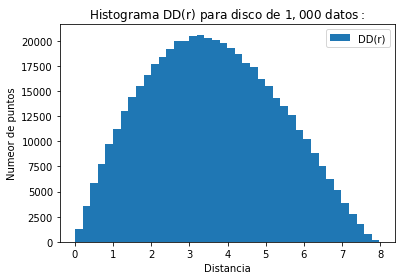

In [85]:
DD,dato_bin,n = plt.hist((dis_DD),bins=40, label='DD(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DD(r)\ para\ disco\ de \ 1,000\ datos:}$')
plt.legend()
plt.show()

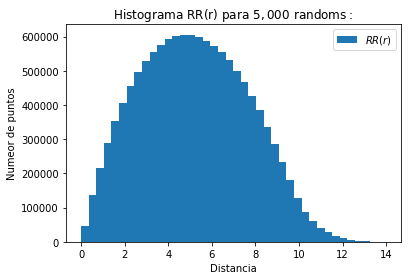

In [86]:
RR,random_bin,m = plt.hist((dis_RR),bins=40, label='$RR(r)$')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  RR(r)\ para\ 5,000\ randoms:}$')
plt.legend()
plt.show()

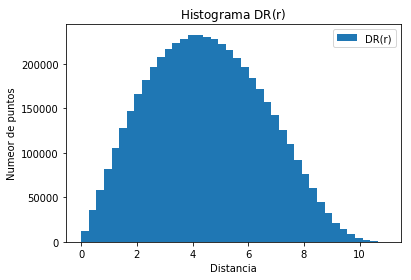

In [87]:
DR,datorandom_bin,p = plt.hist((dis_DR),bins=40, label='DR(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DR(r)}$')
plt.legend()
plt.show()

Correlaciones entre los histoggramas

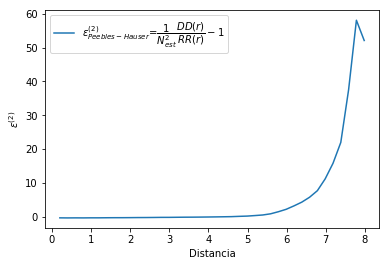

In [88]:
Nest= ((N*(N-1))/(Nm*(Nm-1)))
plt.plot(dato_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

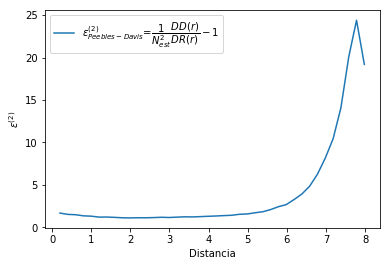

In [89]:
plt.plot(dato_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{DR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

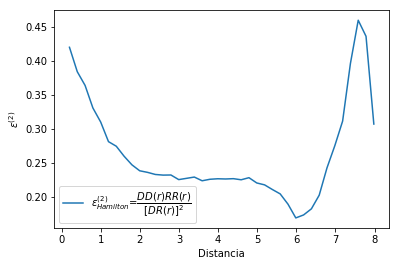

In [90]:
plt.plot(dato_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$=$\dfrac{DD(r)RR(r)}{[DR(r)]^2}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

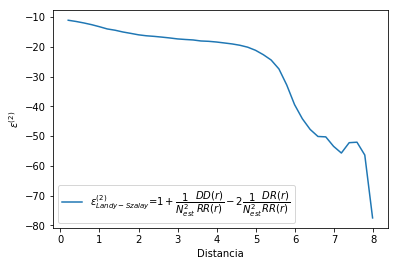

In [105]:
plt.plot(dato_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$=$1+\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-2\dfrac{1}{N_{est}^{2}}\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

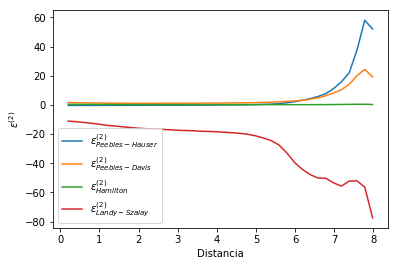

In [106]:
plt.plot(dato_bin[1:],Nest*(DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$'))
plt.plot(dato_bin[1:],Nest*(DD/DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$'))
plt.plot(dato_bin[1:],((DD*RR)/(DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$'))
plt.plot(dato_bin[1:],(1+Nest*(DD/RR) - 2*Nest*(DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

# Anillo

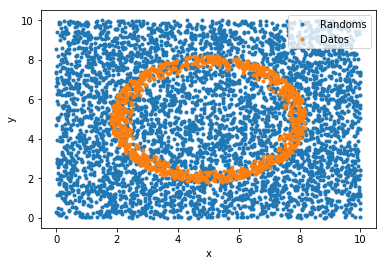

In [93]:
rad = 3 #Radio

#Generar anillo
theta = np.random.uniform(0.0, 2.0*np.pi, Nm)
r = (rad-0.5)+ np.sqrt(np.random.uniform(0, 0.5, Nm))
x_a =  r * np.cos(theta) +5
y_a = r * np.sin(theta)  +5

plt.plot(c_x,c_y,'.',label='Randoms')
plt.plot(x_a,y_a,'.',label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



In [94]:
#contador
disA_DD = [] #DD(r)
disA_RR = [] #RR(r)
disA_DR = [] #DR(r)

In [95]:
for i in range(Nm):
    for j in range(i+1,Nm):
        da_dd = distancia(x_a[i],x_a[j],y_a[i],y_a[j])
        disA_DD.append(da_dd)

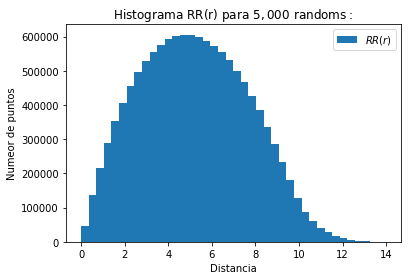

In [97]:
#La distancia entre los randoms (RR), ya la tenemos 
RR,random_bin,m = plt.hist((dis_RR),bins=40, label='$RR(r)$')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  RR(r)\ para\ 5,000\ randoms:}$')
plt.legend()
plt.show()

In [96]:
for i in range(Nm):
    for j in range(N):
        da_dr = distancia(x_a[i],c_x[j],y_a[i],c_y[j])
        disA_DR.append(da_dr)

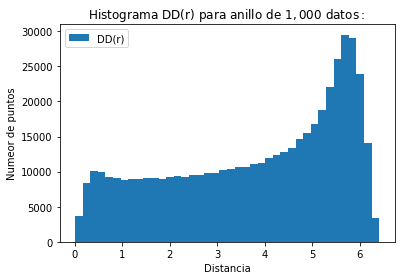

In [98]:
A_DD,datoA_bin,A_n = plt.hist((disA_DD),bins=40, label='DD(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DD(r)\ para\ anillo\ de \ 1,000\ datos:}$')
plt.legend()
plt.show()

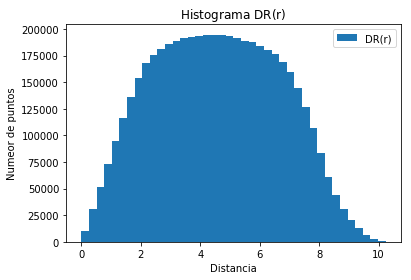

In [99]:
A_DR,datorandomA_bin,A_p = plt.hist((disA_DR),bins=40, label='DR(r)')
plt.xlabel('Distancia')
plt.ylabel('Numeor de puntos')
plt.title('$\mathrm{Histograma\  DR(r)}$')
plt.legend()
plt.show()

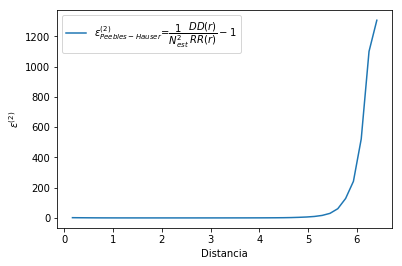

In [102]:
plt.plot(datoA_bin[1:],Nest*(A_DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

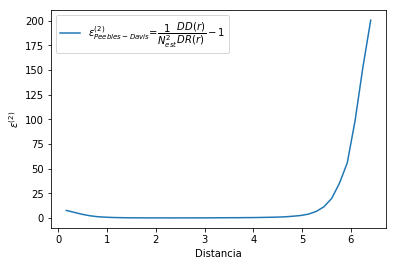

In [103]:
plt.plot(datoA_bin[1:],Nest*(A_DD/A_DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$=$\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{DR(r)}-1$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

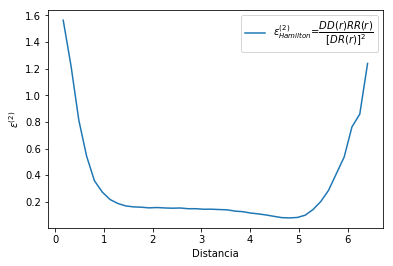

In [104]:
plt.plot(datoA_bin[1:],((A_DD*RR)/(A_DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$=$\dfrac{DD(r)RR(r)}{[DR(r)]^2}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

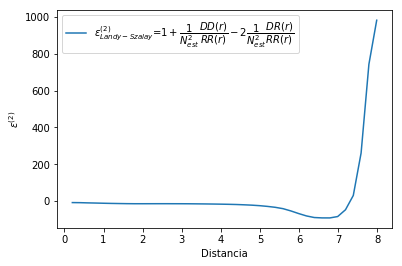

In [107]:
plt.plot(dato_bin[1:],(1+Nest*(A_DD/RR) - 2*Nest*(A_DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$=$1+\dfrac{1}{N_{est}^{2}}\dfrac{DD(r)}{RR(r)}-2\dfrac{1}{N_{est}^{2}}\dfrac{DR(r)}{RR(r)}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()

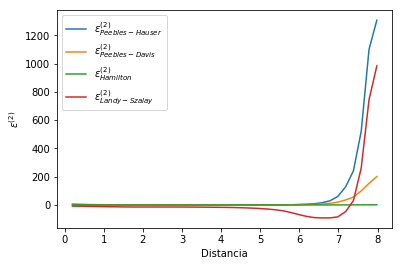

In [108]:
plt.plot(dato_bin[1:],Nest*(A_DD/RR) -1, label=('$\epsilon^{(2)}_{Peebles-Hauser}$'))
plt.plot(dato_bin[1:],Nest*(A_DD/A_DR) -1, label=('$\epsilon^{(2)}_{Peebles-Davis}$'))
plt.plot(dato_bin[1:],((A_DD*RR)/(A_DR)**2), label=('$\epsilon^{(2)}_{Hamilton}$'))
plt.plot(dato_bin[1:],(1+Nest*(A_DD/RR) - 2*Nest*(A_DR/RR)), label=('$\epsilon^{(2)}_{Landy-Szalay}$'))
plt.xlabel('Distancia')
plt.ylabel('$\epsilon^{(2)}$')
plt.legend()